# 회귀(Regression)

지도 학습(Supervised Learning)으로 예측할 Target이 연속형(continuous) 데이터(float)인 경우

## 회귀의 주요 평가 지표
예측값과 실제 값간의 차이를 구한다

- ### MSE (Mean Squared Error)
    - 실제 값과 예측값의 차를 제곱해 평균 낸 것
    - mean_squared_error() 
    - 'neg_mean_squared_error'
    $$
    MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
    y_i: 실제값, \hat{y_i}: 모델이 예측한 값
    $$
    
- ### RMSE (Root Mean Squared Error)
    - MSE는 오차의 제곱한 값이므로 실제 오차의 평균보다 큰 값이 나온다.  MSE의 제곱근이 RMSE이다.
    - scikit-learn은 함수를 지원하지 않는다. (MSE를 구한 뒤 np.sqrt()로 제곱근을 구한다.)
    $$
    RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
    $$

- ### $R^2$ (R square, 결정계수)
    - 평균으로 예측했을 때 오차(총오차) 보다 모델을 사용했을 때 얼마 만큼 더 좋은 성능을 내는지를 비율로 나타낸 값. 
    - 1에 가까울 수록 좋은 모델.
    - r2_score()
    - 'r2'
    - [참고](https://ko.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/assessing-the-fit-in-least-squares-regression/a/r-squared-intuition)
    $$
    R^2 = \cfrac{\sum_{i=1}^{n}(\hat{y_i}-\bar{y})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
    $$

- $y_i$ : i번째 실제 값, 
- $\hat{y_i}$ : i 번째 예측 값, 
- $\bar{y}$ : y의 평균    



In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [25]:
# 회귀문제에 사용할 수 있는 가상의 데이터셋을 원하는 조건을 설정해서 생성하는 함수(make_xxxxx())
X, y = make_regression(n_samples=100, #데이터의 개수
                       n_features=1, #feature(커럼) 개수
                       n_informative=1, #target(label)에 영향을 주는 feature 개수
                       noise=30, # 잡음, 모델이 찾을수 없는 값의 범위
                       random_state=0)

In [21]:
X.shape, y.shape

((100, 1), (100,))

In [22]:
X[:5]

array([[-0.35955316],
       [ 0.97663904],
       [ 0.40234164],
       [-0.81314628],
       [-0.88778575]])

In [23]:
y[:5]

array([-29.38797228, -18.77135911,   0.56377656,  19.90502386,
       -31.84342122])

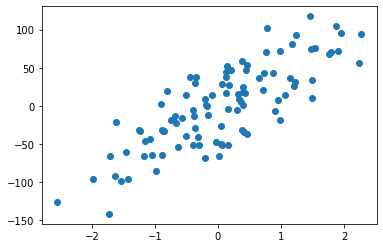

In [24]:
plt.scatter(X, y)
plt.show()

In [26]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(0.1344193000112442,
 -141.9934839876259,
 117.54737632470687,
 1.2075194195120451)

In [27]:
# LinearRegression 모델을 이용해서 추론 후 모델평가
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [37]:
pred = lr.predict(X)

In [41]:
# new_X = [[0.56],[1.2],[-0.7]]   # y?
# lr.predict(new_X)

array([ 21.68633197,  49.26219191, -32.60364229])

In [43]:
# 모델 평가 
# MSE, RMSE, R2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, pred) #(정답, 모델예측결과)
rmse = np.sqrt(mse)
r2 = r2_score(y, pred)
print(f"MSE: {mse}, RMSE: {rmse}, R2: {r2}")

MSE: 1027.5433755137535, RMSE: 32.055317429620835, R2: 0.6473091780922585


In [46]:
# cross validation
lr2 = LinearRegression()
score_list = cross_val_score(lr2, #모델
                             X, y, 
                             cv=3, #fold 개수
                             scoring="r2",  #생략: 기본-분류모델: accuracy, 회귀모델: r2(R square)
                            )

In [48]:
print(score_list) #fold별 검증결과
print(np.mean(score_list))

[0.57447588 0.58987265 0.55276667]
0.5723717334851716


In [49]:
score_list = cross_val_score(lr2, #모델
                             X, y, 
                             cv=3, #fold 개수
                             scoring="neg_mean_squared_error", #MSE * -1
                            )

In [52]:
print(score_list*-1)
np.mean(score_list*-1)

[1307.38952617 1332.84952275  859.62106567]


1166.6200381987528

In [53]:
#RMSE
print(np.sqrt(score_list*-1))
np.sqrt(np.mean(score_list*-1))

[36.15784184 36.50821172 29.31929511]


34.155819975499824

In [54]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [56]:
# LR.coef_ (Feature별 가중치), LR.intercept_ (bias)
print(lr.coef_, lr.intercept_)

[43.08728116] -2.442545481092178


In [57]:
def my_pred(X):
    return lr.coef_[0] * X + lr.intercept_

In [62]:
new_X = np.array(new_X)
my_pred(new_X)

array([[ 21.68633197],
       [ 49.26219191],
       [-32.60364229]])

In [63]:
lr.predict(new_X)

array([ 21.68633197,  49.26219191, -32.60364229])

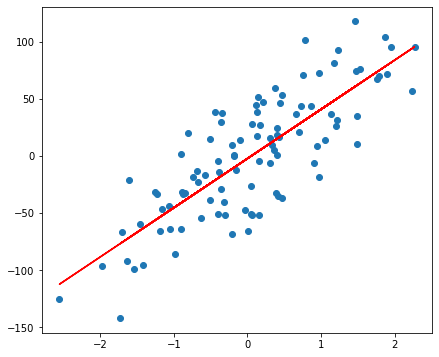

In [68]:
# X, y와 예측결과를 시각
plt.figure(figsize=(7,6))

plt.scatter(X, y)
y_hat = my_pred(X)  #lr.predict(X)
plt.plot(X, y_hat, color='red')

plt.show()

## 기존 분류 모델의 회귀 모델

In [69]:
from sklearn.model_selection import train_test_split


# XXXXClassifier (분류), XXXXRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #stratify: 회귀에서는 지정하지 않는다.

In [72]:
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
svr = SVR()

est = [
    ("knn", knn), 
    ("tree", tree),
    ("rf", rf),
    ('GB', gb),
    ("svr",svr)
]

In [73]:
def print_regression_metrics(y, pred, title=None):
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, pred)
    if title:
        print(title)
    print(f"MSE: {mse}, RMSE: {rmse}, R Square: {r2}")

In [76]:
for model_name, model in est:
    #학습
    model.fit(X_train, y_train)
    #모델 평가
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    print_regression_metrics(y_train, pred_train, title=f'{model_name}-Train')
    print_regression_metrics(y_test, pred_test, title=f'{model_name}-Test')
    print('-'*100)

knn-Train
MSE: 848.1395842397269, RMSE: 29.12283612974064, R Square: 0.7239989948587914
knn-Test
MSE: 1181.4263196957993, RMSE: 34.371882690591725, R Square: 0.47404777230081696
----------------------------------------------------------------------------------------------------
tree-Train
MSE: 0.0, RMSE: 0.0, R Square: 1.0
tree-Test
MSE: 1774.249296708706, RMSE: 42.12183871471788, R Square: 0.21013240136893951
----------------------------------------------------------------------------------------------------
rf-Train
MSE: 226.63828248496992, RMSE: 15.054510370150533, R Square: 0.9262475246625814
rf-Test
MSE: 1367.4213678317697, RMSE: 36.978660979432036, R Square: 0.3912457318542162
----------------------------------------------------------------------------------------------------
GB-Train
MSE: 158.09406068470207, RMSE: 12.573546066432575, R Square: 0.9485531385792508
GB-Test
MSE: 1377.898258279898, RMSE: 37.120051970328625, R Square: 0.3865815866775857
-------------------------------

In [79]:
vote = VotingRegressor(est)
vote.fit(X_train, y_train)

print_regression_metrics(y_train, vote.predict(X_train), title="Voting Train")
print_regression_metrics(y_test, vote.predict(X_test), title="Voting Test")


Voting Train
MSE: 359.42056771276003, RMSE: 18.9583904304337, R Square: 0.8830376039504524
Voting Test
MSE: 1187.160990455263, RMSE: 34.4552026616484, R Square: 0.471494787987891


In [80]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [81]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, out_file=None, rounded=True, filled=True))

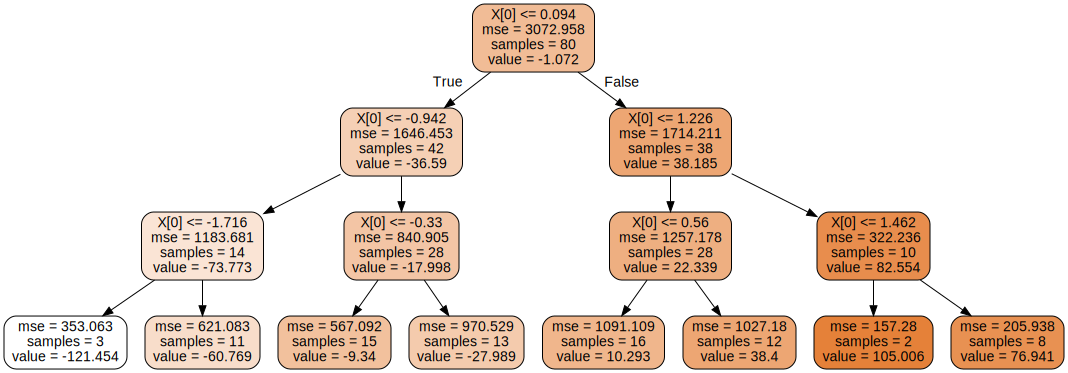

In [82]:
graph

In [83]:
print_regression_metrics(y_train, tree.predict(X_train))

MSE: 759.5041257600093, RMSE: 27.559102412088993, R Square: 0.7528426853151011


In [84]:
print_regression_metrics(y_test, tree.predict(X_test))

MSE: 1249.1987990885523, RMSE: 35.34400655116158, R Square: 0.4438765412057678
